# Logistic Regression, Activation Functions, Logloss and CrossEntropy
# Name:- Suryansh Ambekar
# PRN no:- 202201090042
# Batch:- T3

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1


In [ ]:
import pandas as pd
df=pd.read_csv("/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


# Logistic Regression

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1592    0]
 [   0  408]]


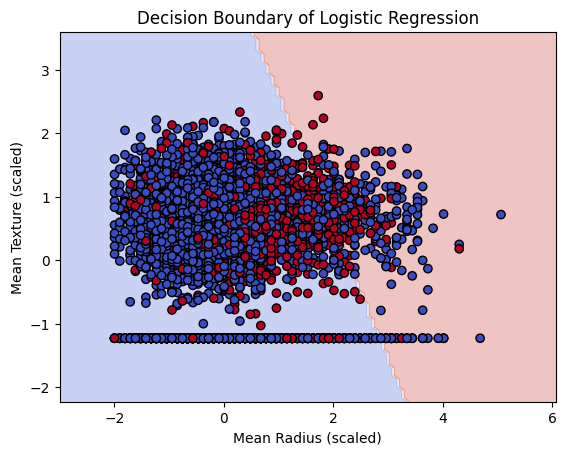

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
# Loading the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv")

# Drop irrelevant columns (RowNumber, CustomerId, Surname)
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Remove rows with any NaN values
df = df.dropna()

# Extracting features (X) and target (y)
X = df.drop(columns=["Exited"]).values  # Exited is the target (Churn: 1, No Churn: 0)
y = df["Exited"].values  # Target variable (Exited column)

# One-Hot Encoding for categorical features 'Geography' and 'Gender'
categorical_features = ['Geography', 'Gender']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical_features])

# Remove original categorical columns and add the encoded columns
X = np.hstack((df.drop(columns=categorical_features).values, encoded_cats))

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Function to plot the decision boundary (adjusted for 2 features)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.xlabel('Mean Radius (scaled)')
    plt.ylabel('Mean Texture (scaled)')
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

# You can plot the decision boundary with two selected features if you'd like:
# For example, let's use 'Age' and 'Balance' features for decision boundary visualization
X_selected = df[['Age', 'Balance']].values

# Normalize the selected features
X_selected = scaler.fit_transform(X_selected)

# Split into training and testing sets for the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train the model again with the selected features
model.fit(X_train, y_train)

# Plotting the decision boundary
plot_decision_boundary(X_train, y_train, model)


In [ ]:
# Get predicted probabilities for the test set (not the class labels)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
print(y_pred_proba)
# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


[0.06127567 0.23919669 0.55938388 ... 0.23421883 0.14665681 0.10394562]
Log Loss: 0.4634
Accuracy: 1.00


# Sigmoid Function

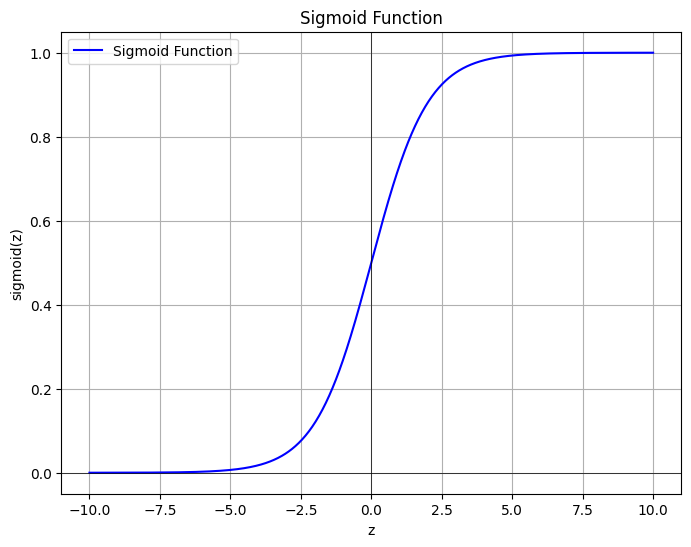

Accuracy: 77.40%


In [ ]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot the sigmoid function
z_values = np.linspace(-10, 10, 1000)  # Generate values for z
sigmoid_values = sigmoid(z_values)  # Compute sigmoid values

plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label="Sigmoid Function", color="b")
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Train the logistic regression model
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


# TanH Function

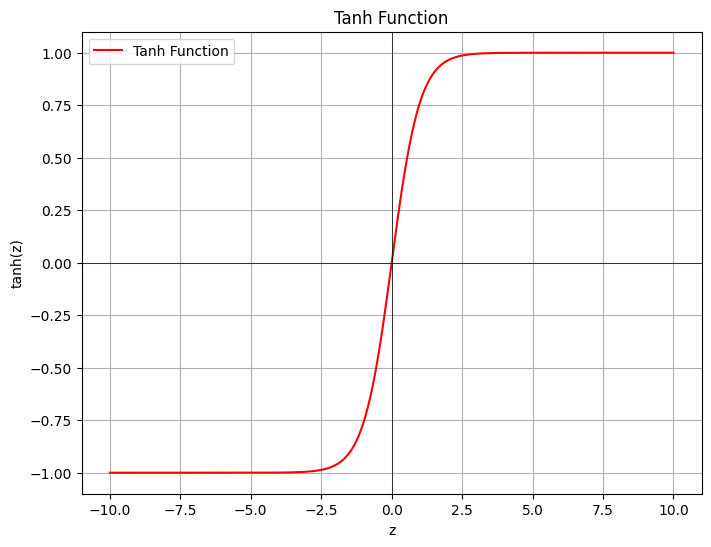

Accuracy (Tanh): 23.95%


In [ ]:

# Tanh activation function
def tanh(z):
    return np.tanh(z)

# Plot the Tanh function
z_values = np.linspace(-10, 10, 1000)  # Generate values for z
tanh_values = tanh(z_values)  # Compute tanh values

plt.figure(figsize=(8, 6))
plt.plot(z_values, tanh_values, label="Tanh Function", color="r")
plt.title("Tanh Function")
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Train the model with Tanh activation
model_tanh = LogisticRegressionTanh(learning_rate=0.1, epochs=1000)
model_tanh.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tanh = model_tanh.predict(X_test)

# Evaluate accuracy
accuracy_tanh = np.mean(y_pred_tanh == y_test)
print(f'Accuracy (Tanh): {accuracy_tanh * 100:.2f}%')


# ReLU Function

Accuracy (ReLU): 23.15%


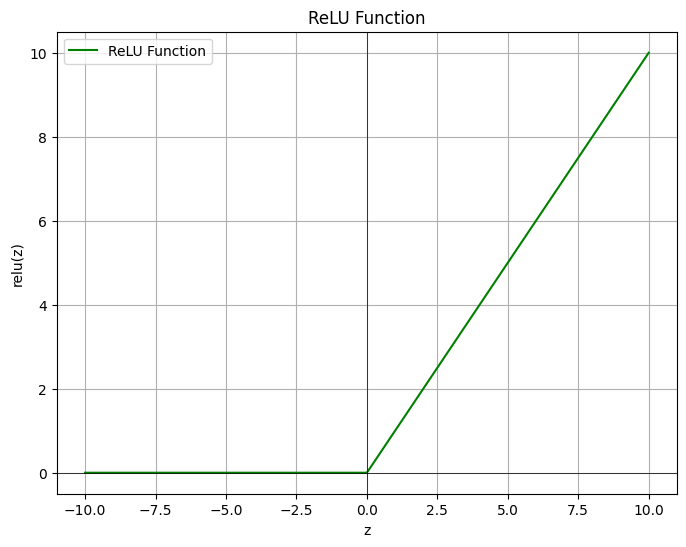

In [ ]:

# ReLU function
def relu(z):
    return np.maximum(0, z)


# Train the model with ReLU activation
model_relu = LogisticRegressionReLU(learning_rate=0.1, epochs=1000)
model_relu.fit(X_train, y_train)

# Make predictions on the test set
y_pred_relu = model_relu.predict(X_test)

# Evaluate accuracy
accuracy_relu = np.mean(y_pred_relu == y_test)
print(f'Accuracy (ReLU): {accuracy_relu * 100:.2f}%')

# Plot the ReLU function
z_values = np.linspace(-10, 10, 1000)  # Generate values for z
relu_values = relu(z_values)  # Compute ReLU values

plt.figure(figsize=(8, 6))
plt.plot(z_values, relu_values, label="ReLU Function", color="g")
plt.title("ReLU Function")
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


# Logless for a Vector Code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Softmax Activation Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss for Multiclass Classification
def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Gradient Descent for Softmax Regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]  # Number of training examples
    for epoch in range(epochs):
        # Compute predictions
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradients
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Compute and print loss every 100 epochs
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")

    return weights

# Load the Bank Churn dataset
file_path = "/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Convert categorical columns to numerical
df["Geography"] = df["Geography"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes

# Define features and target variable
X = df.drop(columns=["Exited"]).values  # Features
y = df["Exited"].values  # Target (Churn: 1, No Churn: 0)

# Convert target variable into one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Convert labels to one-hot format

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add an intercept term (bias) to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights (for 2 output classes: Churn, No Churn)
num_classes = y.shape[1]
weights = np.zeros((X_train.shape[1], num_classes))

# Train the model using Gradient Descent
learning_rate = 0.1
epochs = 1000
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Make predictions on the test set
z_test = np.dot(X_test, weights)
y_test_pred_prob = sigmoid(z_test)  # Get class probabilities
y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convert to class labels
y_test_true = np.argmax(y_test, axis=1)  # True class labels

# Compute test loss and accuracy
test_loss = compute_cross_entropy_loss(y_test, y_test_pred_prob)
accuracy = np.mean(y_test_pred == y_test_true)

print(f"\nTest Cross-Entropy Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Cross-Entropy Loss: nan
Epoch 100, Cross-Entropy Loss: nan
Epoch 200, Cross-Entropy Loss: nan
Epoch 300, Cross-Entropy Loss: nan
Epoch 400, Cross-Entropy Loss: nan
Epoch 500, Cross-Entropy Loss: nan
Epoch 600, Cross-Entropy Loss: nan
Epoch 700, Cross-Entropy Loss: nan
Epoch 800, Cross-Entropy Loss: nan
Epoch 900, Cross-Entropy Loss: nan

Test Cross-Entropy Loss: nan
Test Accuracy: 0.7961
